## Зчитування файлу doc6.txt

In [1]:
with open('doc6.txt') as file:
    corpus = [line.rstrip() for line in file]
print(corpus)

['Combine the eggs, extract, sugar and salt in a mixing bowl or the bowl of an electric mixer and whip with a hand mixer set at high speed or in a heavy duty mixer fitted with the whip.', 'Graphic design is an essential aspect of any marketing campaign or emerging business.', 'This is in fact a hot topic in medicine these days, and much of the medical literature is devoted to this.', 'While the egg mixture is whipping, combine the flour, cornstarch and baking powder and stir to mix.', 'He paints himself as a lone researcher with a new breakthrough battling an intolerant medical establishment.', 'This simple, seamless graphic design software makes it easy to spice up your marketing and social media initiatives.']


## Попередня обробка корпусу

In [2]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import re

stop_words = stopwords.words('english')
tokenizer = WordPunctTokenizer()


def preprocess_document(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = tokenizer.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

In [3]:
import numpy as np
import pandas as pd

preprocess_corpus = np.vectorize(preprocess_document)
preprocessed_corpus = preprocess_corpus(corpus)
corpus_df = pd.DataFrame(preprocessed_corpus, columns=['Document'])
corpus_df

,Document
0,combine eggs extract sugar salt mixing bowl bo...
1,graphic design essential aspect marketing camp...
2,fact hot topic medicine days much medical lite...
3,egg mixture whipping combine flour cornstarch ...
4,paints lone researcher new breakthrough battli...
5,simple seamless graphic design software makes ...


## Представлення корпусу як моделі «Сумка n-грам» з використанням уні- та біграм

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2))
bv_matrix = count_vectorizer.fit_transform(preprocessed_corpus)
print(bv_matrix)

  (0, 14)	1
  (0, 31)	1
  (0, 40)	1
  (0, 114)	1
  (0, 96)	1
  (0, 82)	1
  (0, 6)	2
  (0, 33)	1
  (0, 78)	3
  (0, 118)	2
  (0, 50)	1
  (0, 100)	1
  (0, 54)	1
  (0, 108)	1
  (0, 52)	1
  (0, 25)	1
  (0, 44)	1
  (0, 15)	1
  (0, 32)	1
  (0, 41)	1
  (0, 115)	1
  (0, 97)	1
  (0, 83)	1
  (0, 7)	1
  (0, 8)	1
  :	:
  (4, 60)	1
  (4, 73)	1
  (5, 48)	1
  (5, 21)	1
  (5, 67)	1
  (5, 49)	1
  (5, 102)	1
  (5, 98)	1
  (5, 106)	1
  (5, 65)	1
  (5, 27)	1
  (5, 110)	1
  (5, 104)	1
  (5, 70)	1
  (5, 58)	1
  (5, 103)	1
  (5, 99)	1
  (5, 23)	1
  (5, 107)	1
  (5, 66)	1
  (5, 28)	1
  (5, 111)	1
  (5, 69)	1
  (5, 105)	1
  (5, 71)	1


In [5]:
import pandas as pd

vocab = count_vectorizer.get_feature_names_out()
bag_of_words = pd.DataFrame(bv_matrix.toarray(), columns=vocab)
bag_of_words

,aspect,aspect marketing,baking,baking powder,battling,battling intolerant,bowl,bowl bowl,bowl electric,breakthrough,...,stir,stir mix,sugar,sugar salt,topic,topic medicine,whip,whip hand,whipping,whipping combine
0,0,0,0,0,0,0,2,1,1,0,...,0,0,1,1,0,0,2,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
4,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Вектор для біграми graphic design

In [6]:
bag_of_words['graphic design']

0    0
1    1
2    0
3    0
4    0
5    1
Name: graphic design, dtype: int64

## Представлення корпусу як моделі TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tv_matrix = tfidf_vectorizer.fit_transform(preprocessed_corpus)

## Кластеризація документів за допомогою ієрархічної агломераційної кластеризації

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_matrix

array([[1.        , 0.        , 0.        , 0.03903922, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.2294262 ],
       [0.        , 0.        , 1.        , 0.        , 0.07753582,
        0.        ],
       [0.03903922, 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07753582, 0.        , 1.        ,
        0.        ],
       [0.        , 0.2294262 , 0.        , 0.        , 0.        ,
        1.        ]])

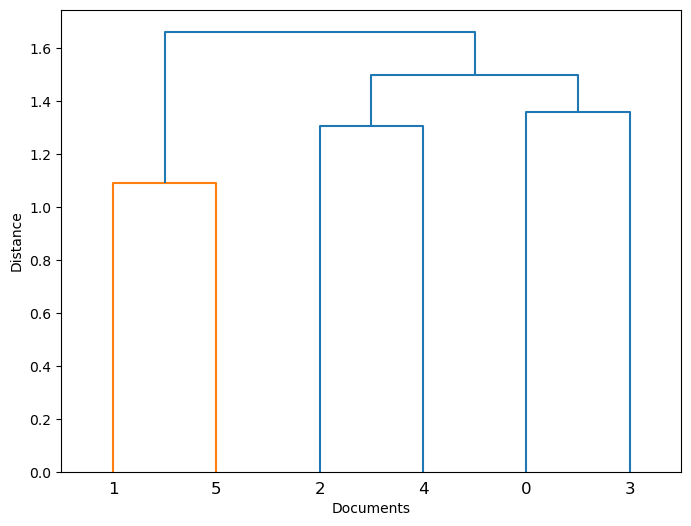

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

links = linkage(similarity_matrix, 'ward')
plt.figure(figsize=(8, 6))
plt.xlabel('Documents')
plt.ylabel('Distance')
dendrogram(links)
plt.show()

In [10]:
from scipy.cluster.hierarchy import fcluster

max_dist = 1.4
cluster_labels = fcluster(links, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=[' ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,ClusterLabel
0,combine eggs extract sugar salt mixing bowl bo...,3
1,graphic design essential aspect marketing camp...,1
2,fact hot topic medicine days much medical lite...,2
3,egg mixture whipping combine flour cornstarch ...,3
4,paints lone researcher new breakthrough battli...,2
5,simple seamless graphic design software makes ...,1


## Представлення корпусу як моделі FastText та знаходження трьох подібних слів до слів mixer, medical

In [11]:
from gensim.models.fasttext import FastText

tokenized_corpus = [doc.split() for doc in preprocessed_corpus]
ft_model = FastText(tokenized_corpus, vector_size=300, window=3, min_count=1, sg=1)
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=3)] for search_term in ['mixer', 'mechanical']}
similar_words

{'mixer': ['mix', 'mixing', 'mixture'],
 'mechanical': ['medical', 'media', 'social']}